In [143]:
!pip install emoji
!pip install nltk
!pip install wordcloud
!pip install scikit-learn
!pip install imblearn
!pip install tensorflow
!pip install transformers

In [144]:
import numpy as np
import emoji
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import string
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow.keras.preprocessing.text

In [215]:
url="https://raw.githubusercontent.com/jawahar2708/projects/refs/heads/main/cyberbullying_tweets.csv"
df= pd.read_csv(url)

In [216]:
df.shape

(47692, 2)

In [147]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [148]:
df['cyberbullying_type'].value_counts()/len(df)

,count
cyberbullying_type,
religion,0.167701
age,0.167575
gender,0.167177
ethnicity,0.166925
not_cyberbullying,0.166590
other_cyberbullying,0.164032


In [149]:
df.count()

,0
tweet_text,47692
cyberbullying_type,47692


In [150]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [152]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [153]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [154]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()


    text=emoji.replace_emoji(text, replace='')

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove @ mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text=text.lower()

    # Tokenize text
    word = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word = [word for word in word if word not in stop_words]
    exclude =string.punctuation
    word = [word for word in word if word not in exclude]

    lemmatizer = WordNetLemmatizer()
    tagged_words = pos_tag(word)
    lemmatized_words = []
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        elif tag.startswith('JJ'):  # Adjective
            pos = 'a'
        else:
            pos = 'n'  # Default to noun
        lemmatized_words.append(lemmatizer.lemmatize(word, pos))
    text = ' '.join(lemmatized_words)
    return text


In [155]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
df['tweet_text'] = df['tweet_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [156]:
df['tweet_text']

,tweet_text
0,word katandandre food crapilicious mkr
1,aussietv white mkr theblock imacelebrityau tod...
2,classy whore red velvet cupcake
3,meh p thanks head concern another angry dude t...
4,isi account pretend kurdish account like islam...
...,...
47687,black ppl arent expect anything depend anythin...
47688,turner withhold disappointment turner call cou...
47689,swear god dumb nigger bitch get bleach hair re...
47690,yea fuck rt youre nigger fuck unfollow fuck du...


In [157]:
df.drop_duplicates("tweet_text", inplace=True)


In [158]:
df = df[df["cyberbullying_type"] != "other_cyberbullying"]
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'age', 'ethnicity'],
      dtype=object)

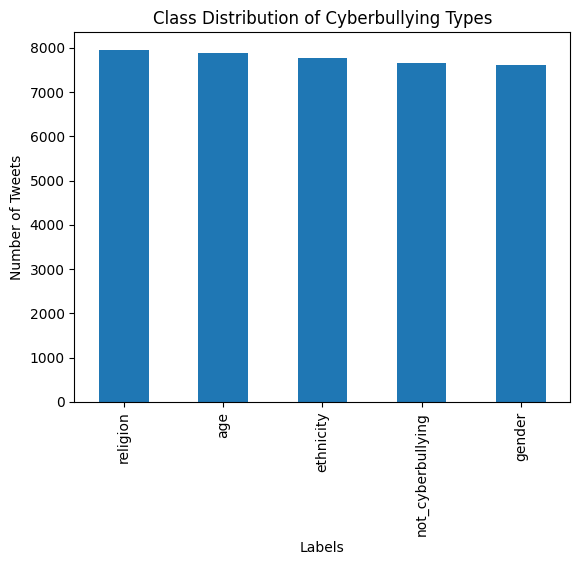

In [159]:
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

In [160]:
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['cyberbullying_type'])

In [161]:
df.head()

,tweet_text,cyberbullying_type,Label
0,word katandandre food crapilicious mkr,not_cyberbullying,3
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,3
2,classy whore red velvet cupcake,not_cyberbullying,3
3,meh p thanks head concern another angry dude t...,not_cyberbullying,3
4,isi account pretend kurdish account like islam...,not_cyberbullying,3


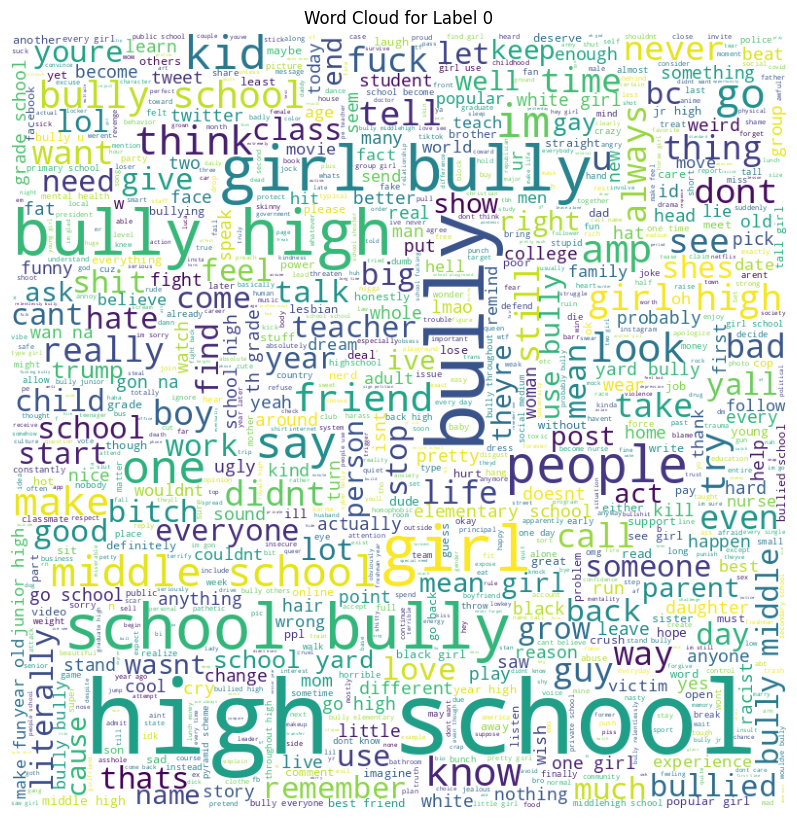

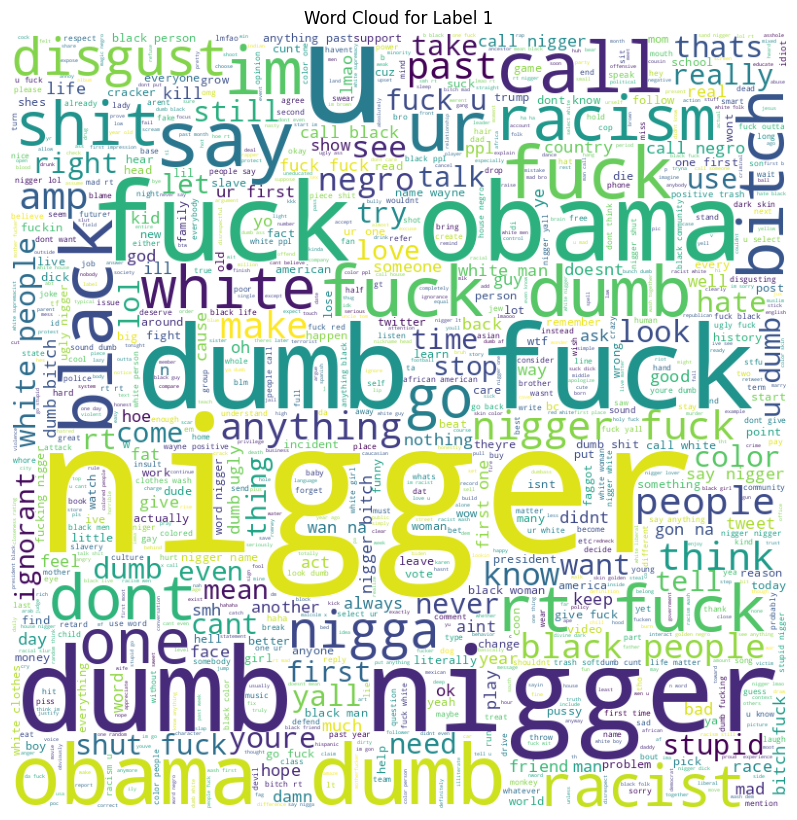

In [162]:

text_label_0 = ' '.join(df[df['Label'] == 0]['tweet_text'].values)

# Combine all cleaned tweets for label 1 into a single string
text_label_1 = ' '.join(df[df['Label'] == 1]['tweet_text'].values)


# Generate word cloud for label 0
wordcloud_label_0 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_0)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_0)
plt.axis("off")
plt.title('Word Cloud for Label 0')
plt.tight_layout(pad=0)
plt.show()

wordcloud_label_1 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_1)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_1)
plt.axis("off")
plt.title('Word Cloud for Label 1')
plt.tight_layout(pad=0)
plt.show()

In [163]:
X = df['tweet_text']
y=df['Label']

In [164]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [165]:
X_train.shape

(31116,)

In [166]:
tfidf = TfidfVectorizer()

In [167]:
tfidf_X = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [168]:
tfidf_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 414220 stored elements and shape (31116, 34430)>

In [169]:
tfidf_test.shape

(7780, 34430)

In [170]:
smote = SMOTE()

X_resampled,y_resampled = smote.fit_resample(tfidf_X,y_train)

In [171]:
X_resampled

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 424267 stored elements and shape (31805, 34430)>

In [172]:
lr = LogisticRegression()

lr.fit(X_resampled,y_resampled)

LogisticRegression()

In [173]:
y_pred=lr.predict(tfidf_test)

In [174]:
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1619
           1       0.98      0.98      0.98      1604
           2       0.93      0.86      0.89      1486
           3       0.79      0.84      0.81      1479
           4       0.95      0.94      0.95      1592

    accuracy                           0.92      7780
   macro avg       0.92      0.92      0.92      7780
weighted avg       0.92      0.92      0.92      7780

[[1577    2    3   35    2]
 [   1 1573   10   17    3]
 [   6    9 1272  192    7]
 [  89   16   75 1239   60]
 [   1    3   10   85 1493]]


In [175]:
svm = SVC()
svm.fit(X_resampled,y_resampled)


SVC()

In [176]:
y_pred1= svm.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1619
           1       0.98      0.98      0.98      1604
           2       0.95      0.85      0.90      1486
           3       0.80      0.86      0.83      1479
           4       0.96      0.94      0.95      1592

    accuracy                           0.93      7780
   macro avg       0.93      0.92      0.92      7780
weighted avg       0.93      0.93      0.93      7780

[[1585    2    3   28    1]
 [   2 1574    7   18    3]
 [   6   10 1262  201    7]
 [  81   11   52 1278   57]
 [   1    3    7   80 1501]]


In [177]:
rf = RandomForestClassifier()
rf.fit(X_resampled,y_resampled)

RandomForestClassifier()

y_pred1= rf.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

In [178]:
y_pred1= rf.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1619
           1       0.99      0.99      0.99      1604
           2       0.94      0.86      0.90      1486
           3       0.80      0.89      0.84      1479
           4       0.95      0.95      0.95      1592

    accuracy                           0.93      7780
   macro avg       0.93      0.93      0.93      7780
weighted avg       0.94      0.93      0.93      7780

[[1580    0    2   36    1]
 [   1 1582    3   15    3]
 [   0    1 1273  207    5]
 [  27    5   68 1315   64]
 [   1    2    4   73 1512]]


In [179]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_resampled,y_resampled)

KNeighborsClassifier()

In [180]:
y_pred1= rf.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1619
           1       0.99      0.99      0.99      1604
           2       0.94      0.86      0.90      1486
           3       0.80      0.89      0.84      1479
           4       0.95      0.95      0.95      1592

    accuracy                           0.93      7780
   macro avg       0.93      0.93      0.93      7780
weighted avg       0.94      0.93      0.93      7780

[[1580    0    2   36    1]
 [   1 1582    3   15    3]
 [   0    1 1273  207    5]
 [  27    5   68 1315   64]
 [   1    2    4   73 1512]]


In [181]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [182]:
# Preprocess the data
tokenizer = Tokenizer(num_words=30000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['tweet_text'])
sequences = tokenizer.texts_to_sequences(df['tweet_text'])


In [183]:

import pickle

In [184]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [185]:
# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=120, padding='post', truncating='post')


In [186]:
# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['cyberbullying_type'])


In [187]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [188]:
# Convert the labels to categorical
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [189]:
# Build a more sophisticated LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=30000, output_dim=128, input_length=120),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [190]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])



In [191]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.6524 - loss: 0.8330 - val_accuracy: 0.9243 - val_loss: 0.2318
Epoch 2/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9364 - loss: 0.2203 - val_accuracy: 0.9281 - val_loss: 0.2349
Epoch 3/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9638 - loss: 0.1322 - val_accuracy: 0.9188 - val_loss: 0.2643
Epoch 4/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9732 - loss: 0.0981 - val_accuracy: 0.9272 - val_loss: 0.2932
Epoch 5/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9779 - loss: 0.0837 - val_accuracy: 0.9247 - val_loss: 0.2956
Epoch 6/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9838 - loss: 0.0554 - val_accuracy: 0.9197 - val_loss: 0.3831
Epoch 7/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9855 - loss: 0.0490 - val_accuracy: 0.9210 - val_loss: 0.3919
Epoch 8/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9867 - loss: 0.0478 - 

In [192]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9039 - loss: 0.5358
Test Accuracy: 0.90


In [193]:
# Save the model architecture to JSON
model_json = model.to_json()
with open("lstm_model.json", "w") as json_file:
    json_file.write(model_json)


In [194]:
# Save the model weights
model.save_weights("lstm_model_weights.weights.h5")


In [195]:
from keras.models import model_from_json

# Load the model architecture from JSON
with open('lstm_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)


In [196]:
# Load the model weights
loaded_model.load_weights("lstm_model_weights.weights.h5")


In [197]:
loaded_model.compile(optimizer='adam', loss='mse')


244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


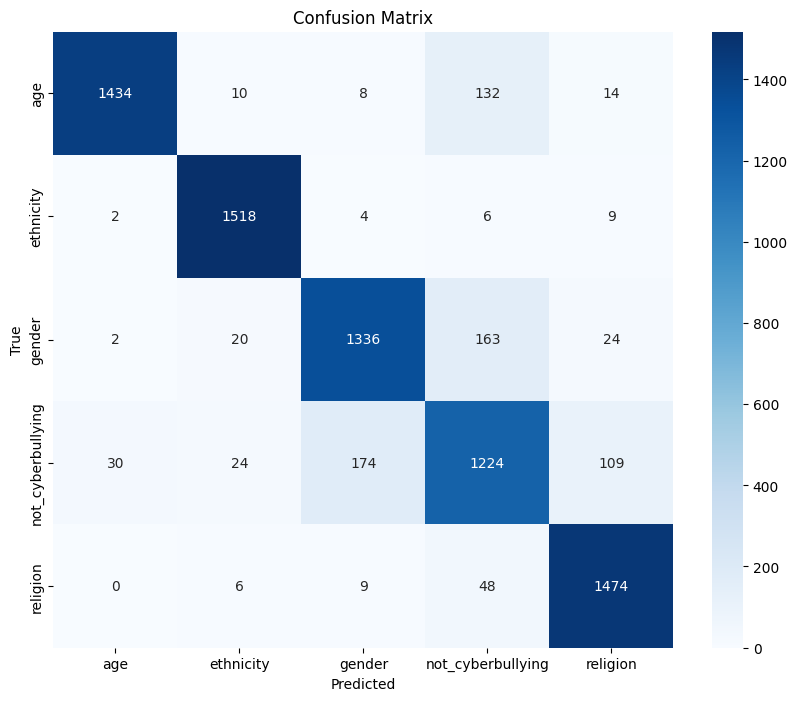

In [198]:

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [199]:
# Classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

                   precision    recall  f1-score   support

              age       0.98      0.90      0.94      1598
        ethnicity       0.96      0.99      0.97      1539
           gender       0.87      0.86      0.87      1545
not_cyberbullying       0.78      0.78      0.78      1561
         religion       0.90      0.96      0.93      1537

         accuracy                           0.90      7780
        macro avg       0.90      0.90      0.90      7780
     weighted avg       0.90      0.90      0.90      7780



In [200]:


# Save the model
model.save('cyberbullying_lstm_model_improved.h5')

In [201]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns




In [202]:
# Sample a smaller subset of the data
sample_size = 500  # You can adjust this number as needed
data_sample = df.sample(n=sample_size, random_state=42)


In [203]:
# Encode the labels
label_encoder = LabelEncoder()
data_sample['Label'] = label_encoder.fit_transform(data_sample['cyberbullying_type'])




In [204]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_sample['tweet_text'], data_sample['Label'], test_size=0.2, random_state=42)


In [205]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [206]:
# Tokenize the data
max_length = 128
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=max_length)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=max_length)



In [207]:
# Convert encodings to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train.tolist()
)).shuffle(len(X_train)).batch(16)  # Smaller batch size

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test.tolist()
)).batch(16)



In [208]:
# Compile the model
from transformers import AdamWeightDecay
optimizer = AdamWeightDecay(learning_rate=3e-5)  # Use Transformers AdamWeightDecay
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [209]:
history = model.fit(train_dataset, epochs=3, validation_data=test_dataset, batch_size=64)


Epoch 1/3
25/25 [==============================] - 24s 367ms/step - loss: 1.5093 - accuracy: 0.3725 - val_loss: 1.1722 - val_accuracy: 0.7300
Epoch 2/3
25/25 [==============================] - 5s 219ms/step - loss: 0.9225 - accuracy: 0.8050 - val_loss: 0.6241 - val_accuracy: 0.8500
Epoch 3/3
25/25 [==============================] - 6s 234ms/step - loss: 0.4449 - accuracy: 0.9200 - val_loss: 0.4141 - val_accuracy: 0.8700


In [210]:
# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {accuracy:.2f}')

7/7 [==============================] - 0s 64ms/step - loss: 0.4141 - accuracy: 0.8700
Test Accuracy: 0.87


In [211]:
y_test.head()

,Label
3111,3
43797,1
13993,2
42653,1
44551,1


7/7 [==============================] - 3s 61ms/step


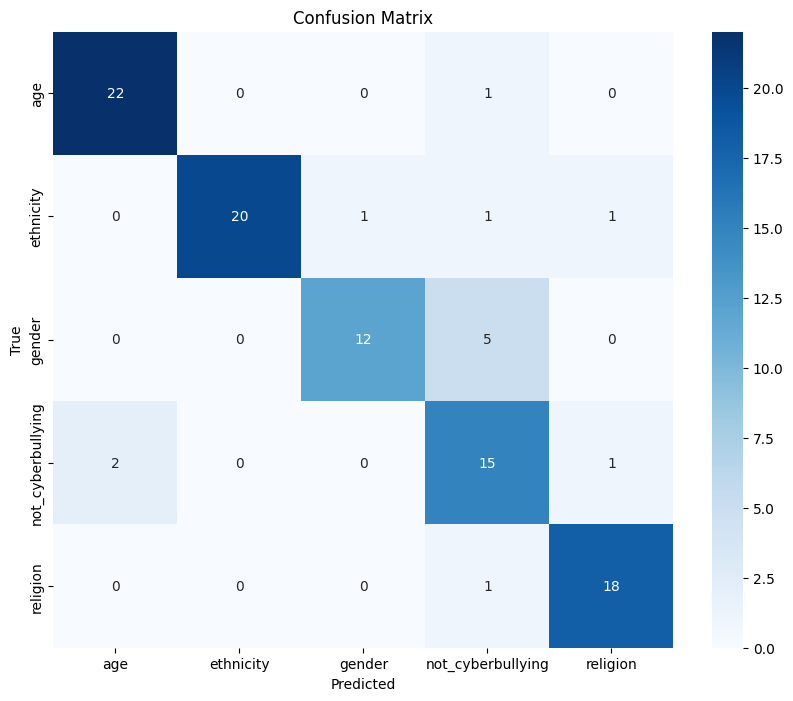

In [212]:
# Generate predictions
y_pred = model.predict(test_dataset).logits
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.values

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [213]:
# Classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

                   precision    recall  f1-score   support

              age       0.92      0.96      0.94        23
        ethnicity       1.00      0.87      0.93        23
           gender       0.92      0.71      0.80        17
not_cyberbullying       0.65      0.83      0.73        18
         religion       0.90      0.95      0.92        19

         accuracy                           0.87       100
        macro avg       0.88      0.86      0.86       100
     weighted avg       0.89      0.87      0.87       100



In [214]:

# Save the model
model.save_pretrained('cyberbullying_bert_model')
tokenizer.save_pretrained('cyberbullying_bert_tokenizer')


('cyberbullying_bert_tokenizer/tokenizer_config.json',
 'cyberbullying_bert_tokenizer/special_tokens_map.json',
 'cyberbullying_bert_tokenizer/vocab.txt',
 'cyberbullying_bert_tokenizer/added_tokens.json')